### Here's the Python code implementation for 3 of the mentioned problems:

#### SIFT

#### SURF

#### RANSAC

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread(r'C:\Users\hp\OneDrive\Pictures\Screenshots\bottle_m.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r'C:\Users\hp\OneDrive\Pictures\Screenshots\bottle.png', cv2.IMREAD_GRAYSCALE)

if img1 is None:
    print("Image 1 not loaded properly")
    exit()

if img2 is None:
    print("Image 2 not loaded properly")
    exit()

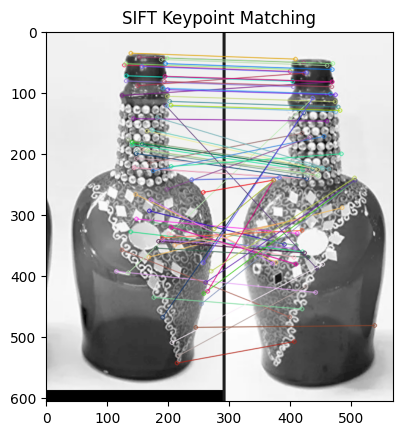

In [2]:
# SIFT
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.imshow(result)
plt.title('SIFT Keypoint Matching')
plt.show()


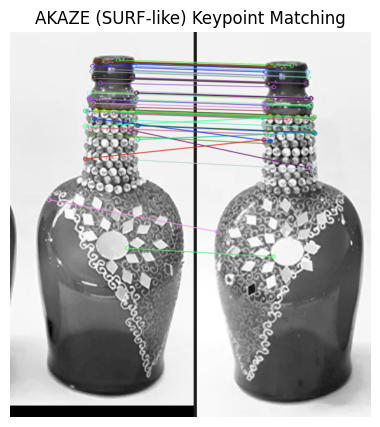

In [7]:
# SURF 


# Initialize AKAZE (best free alternative to SURF)
akaze = cv2.AKAZE_create()

# Detect keypoints & compute descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 good matches
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(10,5))
plt.imshow(result)
plt.title('AKAZE (SURF-like) Keypoint Matching')
plt.axis('off')
plt.show()


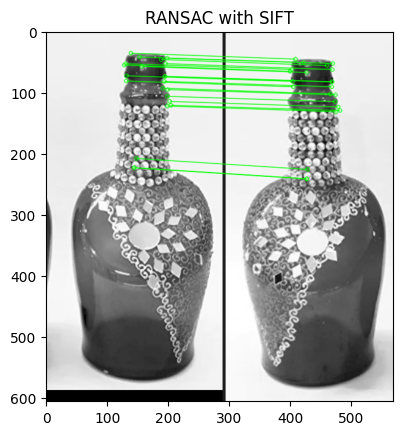

In [10]:
# RANSAC

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

if len(good) > 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    matchesMask = None

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=None,
                   matchesMask=matchesMask,
                   flags=2)

result = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

plt.imshow(result)
plt.title('RANSAC with SIFT')
plt.show()


In [6]:
import cv2

print("OpenCV Version:", cv2.__version__)

try:
    sift = cv2.SIFT_create()
    print("SIFT loaded successfully!")

    surf = cv2.xfeatures2d.SURF_create()
    print("SURF loaded successfully!")

except AttributeError as e:
    print("Error:", e)


OpenCV Version: 4.11.0
SIFT loaded successfully!
Error: module 'cv2' has no attribute 'xfeatures2d'
